# Initialization

In [1]:
%load_ext lab_black
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer, make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    plot_confusion_matrix,
    classification_report,
    plot_roc_curve,
    roc_curve,
    auc,
    mean_squared_error,
)
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA
import numpy as np
from mlxtend.plotting import plot_decision_regions

# Load & explore the data

In [2]:
X, y = load_iris(return_X_y=True, as_frame=True)
X

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

In [3]:
X.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

In [4]:
y.describe()

count    150.000000
mean       1.000000
std        0.819232
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: target, dtype: float64

# Split the data

In [5]:
test_size = 1.0 / 2.0
random_state = 0
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=random_state
)

# Fit the model

In [6]:
model_depth = 2
rfc = RandomForestClassifier(max_depth=model_depth, random_state=random_state)

In [7]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [8]:
y_pred = rfc.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1,
       1, 2, 0, 0, 2, 1, 0, 0, 1])

# Explore the results

In [9]:
y_test.to_numpy()

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1,
       1, 2, 0, 0, 2, 1, 0, 0, 1])

In [10]:
y_pred == y_test.to_numpy()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [11]:
accuracy_score(y_test, y_pred, normalize=True)

0.9066666666666666

In [12]:
confusion_matrix(y_test, y_pred)

array([[21,  0,  0],
       [ 0, 29,  1],
       [ 0,  6, 18]])

In [13]:
confusion_matrix(y_test, y_pred, normalize="true")

array([[1.        , 0.        , 0.        ],
       [0.        , 0.96666667, 0.03333333],
       [0.        , 0.25      , 0.75      ]])

In [14]:
classes_names = load_iris().target_names
print(classification_report(y_test, y_pred, target_names=classes_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        21
  versicolor       0.83      0.97      0.89        30
   virginica       0.95      0.75      0.84        24

    accuracy                           0.91        75
   macro avg       0.93      0.91      0.91        75
weighted avg       0.91      0.91      0.90        75



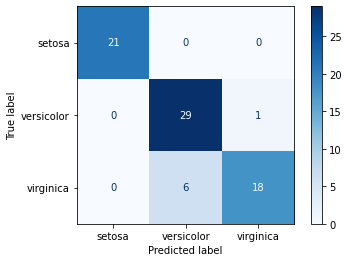

In [15]:
plot_confusion_matrix(
    rfc, X_test, y_test, cmap=plt.cm.Blues, display_labels=classes_names
)
plt.show()

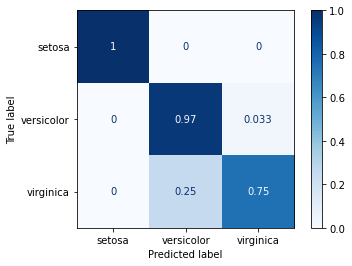

In [16]:
plot_confusion_matrix(
    rfc,
    X_test,
    y_test,
    normalize="true",
    cmap=plt.cm.Blues,
    display_labels=classes_names,
)
plt.show()

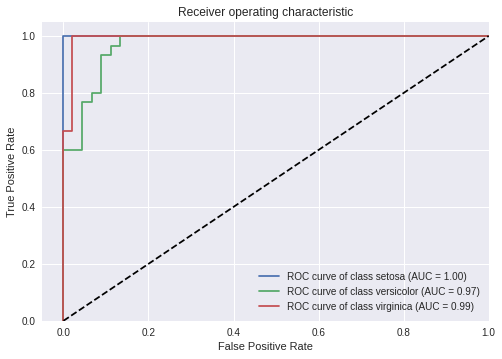

In [17]:
plt.style.use("seaborn")

iris = load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=random_state
)

classifier = OneVsRestClassifier(rfc)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i, class_i in enumerate(classes_names):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
for i, class_i in enumerate(classes_names):
    plt.plot(
        fpr[i], tpr[i], label=f"ROC curve of class {class_i} (AUC = {roc_auc[i]:.2f})"
    )
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Cross-validation

KFold(n_splits=10, random_state=None, shuffle=False)


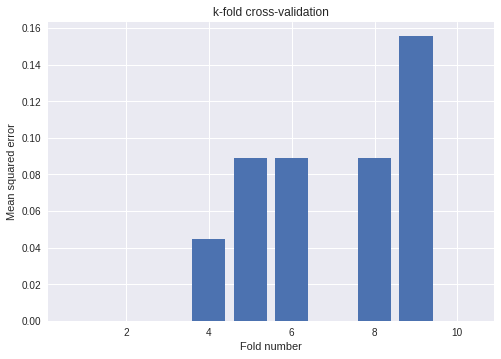

[0.0,
 0.0,
 0.0,
 0.044444444444444446,
 0.08888888888888889,
 0.08888888888888889,
 0.0,
 0.08888888888888889,
 0.15555555555555556,
 0.0]

In [18]:
def MSE(X, y, model):
    kf = KFold(n_splits=10)
    kf.get_n_splits(X)
    print(kf)

    MSE = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        MSE.append(mean_squared_error(y_test, y_pred))

    fig = plt.figure()
    ax = plt.axes()
    ax.bar(range(1, kf.n_splits + 1), MSE)
    ax.set_xlabel("Fold number")
    ax.set_ylabel("Mean squared error")
    ax.set_title("k-fold cross-validation")
    plt.show()

    return MSE


MSE(X, y, rfc)

# Classes boundaries

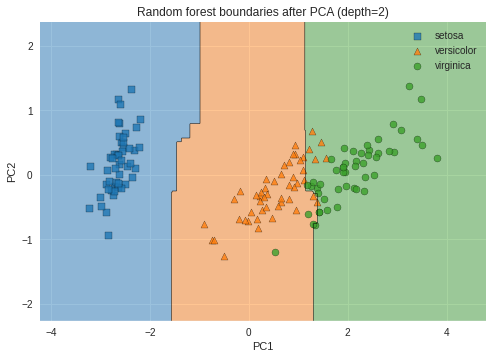

In [19]:
def plot_boundaries(classifier, X, y, classmap=None):
    """
    classifier: an untrained classifier
    X: features matrix
    y: labels vector
    classmap: a dict where the key is the class index, the value is the class name.
              For example {0: "setosa", 1: "versicolor", 2: "virginica"}
    """
    labels = None
    if classmap is not None:
        labels = classmap.values()
    # project X into 2d
    X = PCA(n_components=2).fit_transform(X)
    ax = plot_decision_regions(
        X,
        y.astype(np.uint8),
        clf=classifier.fit(X, y),
        legend=0,
    )
    # custom_labels=labels)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_title(f"Random forest boundaries after PCA (depth={rfc.max_depth})")
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(handles, labels)
    plt.show()


X, y = load_iris(return_X_y=True)
plot_boundaries(rfc, X, y, classmap={i: n for i, n in enumerate(classes_names)})

# Hyperparameters impact

In [20]:
accuracy = []
model_depth = range(1, 6)
for depth in model_depth:
    rfc = RandomForestClassifier(max_depth=depth, random_state=random_state)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred, normalize=True))
accuracy

[0.5866666666666667,
 0.8933333333333333,
 0.8933333333333333,
 0.9333333333333333,
 0.9333333333333333]

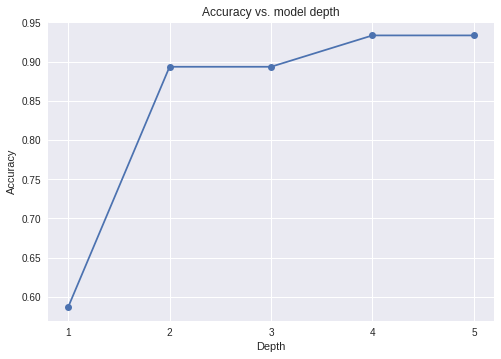

In [21]:
fig = plt.figure()
ax = plt.axes()
ax.plot(model_depth, accuracy, marker="o")
ax.set_xlabel("Depth")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs. model depth")
ax.set_xticks(model_depth)
ax.set_xticklabels([f"{tick:1d}" for tick in model_depth])
plt.show()

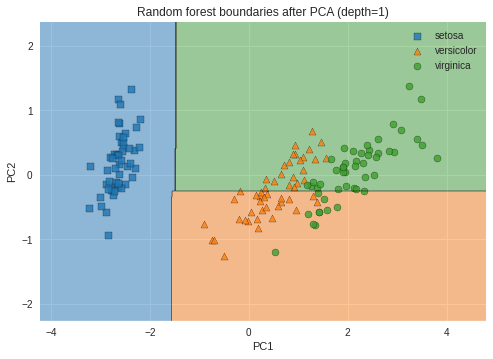

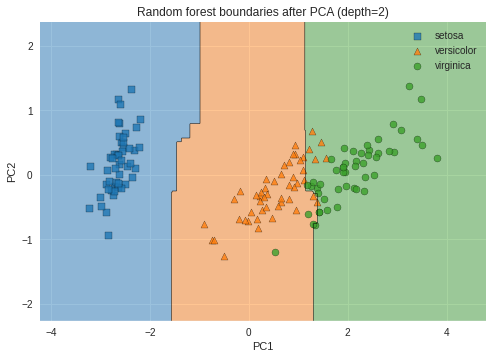

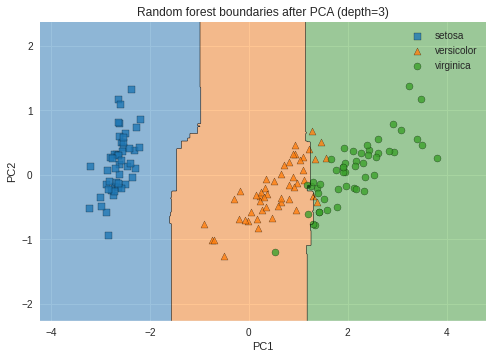

In [22]:
model_depth = range(1, 4)
for depth in model_depth:
    rfc = RandomForestClassifier(max_depth=depth, random_state=random_state)
    plot_boundaries(rfc, X, y, classmap={i: n for i, n in enumerate(classes_names)})